Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               291840    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 28, 256)           0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 28, 256)           525312    
                                                                 
 time_distributed_1 (TimeDi  (None, 28, 28)            7196      
 stributed)                                                      
                                                                 
Total params: 824348 (3.14 MB)
Trainable params: 824348 (3.

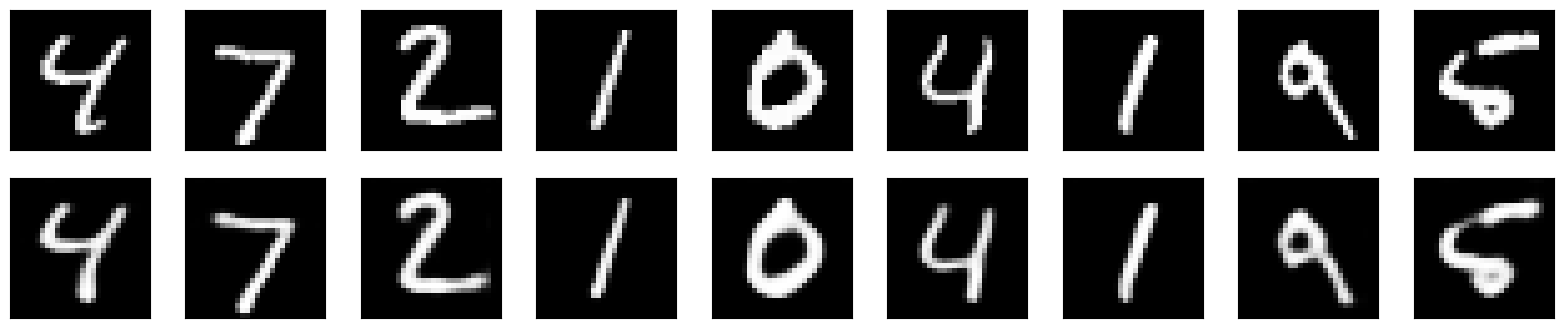

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Charger les données MNIST
(X_train, _), (X_test, _) = mnist.load_data()

# Normaliser les données et les redimensionner
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Reshape des données pour les transformer en séquences
X_train_rnn = X_train.reshape(X_train.shape[0], 28, 28)
X_test_rnn = X_test.reshape(X_test.shape[0], 28, 28)

# Définir les dimensions des images en entrée
input_shape = (28, 28)

# Définir l'encodeur RNN
encoder_inputs = Input(shape=input_shape)
encoded = LSTM(256, return_sequences=False)(encoder_inputs)
encoder_outputs = RepeatVector(28)(encoded)

# Définir le décodeur RNN
decoder = LSTM(256, return_sequences=True)(encoder_outputs)
decoder_outputs = TimeDistributed(Dense(28, activation='sigmoid'))(decoder)

# Créer le modèle global
autoencoder_rnn = Model(encoder_inputs, decoder_outputs)

# Compiler le modèle
autoencoder_rnn.compile(optimizer='adam', loss='mse')

# Afficher le résumé du modèle
autoencoder_rnn.summary()

# Entraîner le modèle
history_rnn = autoencoder_rnn.fit(X_train_rnn, X_train_rnn, epochs=30, batch_size=256, shuffle=True,
                                  validation_data=(X_test_rnn, X_test_rnn))

# Prédire les images reconstruites
reconstructed_images_rnn = autoencoder_rnn.predict(X_test_rnn)

# Reshape les images reconstruites pour les afficher
reconstructed_images_rnn = reconstructed_images_rnn.reshape(-1, 28, 28, 1)

# Afficher quelques exemples d'images originales et reconstruites
indices = [6, 0, 1, 2, 3, 4, 5, 7, 8]
n = len(indices)
plt.figure(figsize=(20, 4))
for i, idx in enumerate(indices):
    # Afficher l'image originale
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Afficher l'image reconstruite
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images_rnn[idx].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
